# Predict Covid-19 in X-ray images

## Part 1: prepare the dataset

### Step 1: get the X-ray images with confirmed Covid19
Download and extract the [dataset](https://github.com/ieee8023/covid-chestxray-dataset) already prepared by [Dr. Joseph Cohen](https://josephpcohen.com/w/).

In [12]:
import pandas as pd
import pathlib
import shutil
import os

In [28]:
# Set the path to the downloaded x-ray images
covid_ds_path = '/home/henriklg/Downloads/covid-chestxray-dataset-master'
# Set the path to where the subset of downloaded x-ray with covid19 should be stored
covid_output_path = './dataset/covid'

# Check if output folder exist, if not, create it
directory = pathlib.Path(covid_output_path)
if not directory.exists():
        os.makedirs(covid_output_path)

In [29]:
# construct the path to the metadata CSV file and load it
csv_path = os.path.sep.join([covid_ds_path, "metadata.csv"])
df = pd.read_csv(csv_path)
covid_count = 0

# loop over the rows of the COVID-19 data frame
for (i, row) in df.iterrows():
    # if (1) the current case is not COVID-19 or (2) this is not
    # a 'PA' view, then ignore the row
    if row["finding"] != "COVID-19" or row["view"] != "PA":
        continue

    # build the path to the input image file
    image_path = os.path.sep.join([covid_ds_path, "images", row["filename"]])

    # if the input image file does not exist (there are some errors in
    # the COVID-19 metadeta file), ignore the row
    if not os.path.exists(image_path):
        continue

    # extract the filename from the image path and then construct the
    # path to the copied image file
    filename = row["filename"].split(os.path.sep)[-1]
    output_path = os.path.sep.join([covid_output_path, filename])
    covid_count += 1

    # copy the image
    shutil.copy2(image_path, output_path)

print ("Succsessfuly copied over {} covid images!".format(covid_count))

Succsessfuly copied over 56 iamges!


Look at some of the images

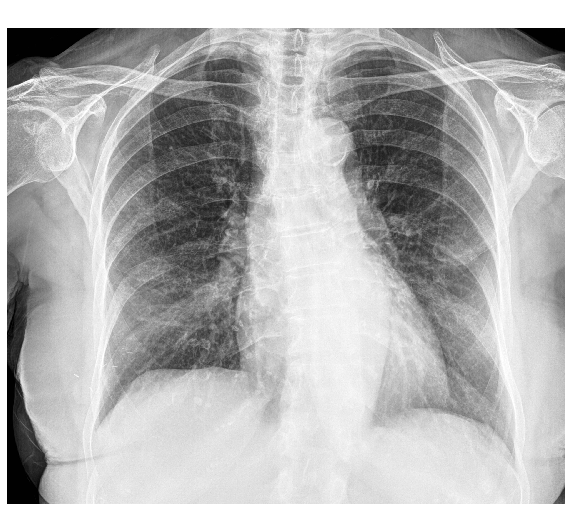

In [20]:
import matplotlib.pyplot as plt

image = plt.imread('dataset/covid/covid-19-pneumonia-14-PA.png')

plt.figure(frameon=False, facecolor='white', figsize = (10,10))
plt.axis("off")
plt.title('Example of Covid19', fontdict={'color':'white','size':20})
plt.imshow(image);
plt.show()

### Step 2: get the normal x-ray images
To find X-ray images of healthy patients I used this [Kaggle dataset](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia). Download and extract

In [36]:
from imutils import paths
import random

In [34]:
# Set the path to the downloaded folder from kaggle
normal_ds_path = '/home/henriklg/Downloads/chest-xray-pneumonia/chest_xray/chest_xray'
# Set path to where you want to save the subset of images containing normal x-rays
normal_output_path = 'dataset/normal'
normal_count = covid_count # grab as many normal images as we have covid images (in my case 56)

# Check if output folder exist, if not, create it
directory = pathlib.Path(normal_output_path)
if not directory.exists():
        os.makedirs(normal_output_path)

In [38]:
# grab all training image paths from the Kaggle X-ray dataset
base_path = os.path.sep.join([normal_ds_path, "train", "NORMAL"])
image_paths = list(paths.list_images(normal_ds_path))

# randomly sample the image paths
random.seed(42)
random.shuffle(image_paths)
image_paths = image_paths[:normal_count]
count = 0

# loop over the image paths
for (i, image_path) in enumerate(image_paths):
    # extract the filename from the image path and then construct the
    # path to the copied image file
    filename = image_path.split(os.path.sep)[-1]
    output_path = os.path.sep.join([normal_output_path, filename])

    # copy the image
    shutil.copy2(image_path, output_path)
    count += 1

print ("Succsessfuly copied over {} normal images!".format(count))

Succsessfuly copied over 56 normal images!


Show an example of a normal X-ray image

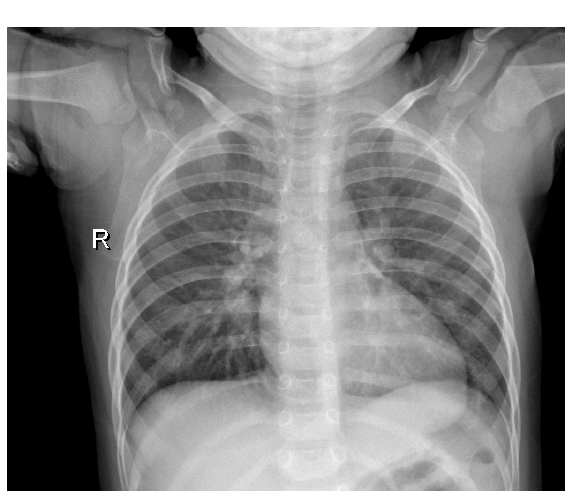

In [24]:
image = plt.imread('dataset/normal/NORMAL2-IM-0630-0001.jpeg')

plt.figure(frameon=False, facecolor='white', figsize = (10,10))
plt.axis("off")
plt.title('Example of normal', fontdict={'color':'white','size':20})
plt.imshow(image, cmap='gray');
plt.show()

Not very easy to tell the two classes apart, huh?

### Now we have created a dataset with one folder for healthy patients and one for sick patients. Next: train the model!